Check sec. 1.2.4 of Christopher Bishop's book on deep learning.

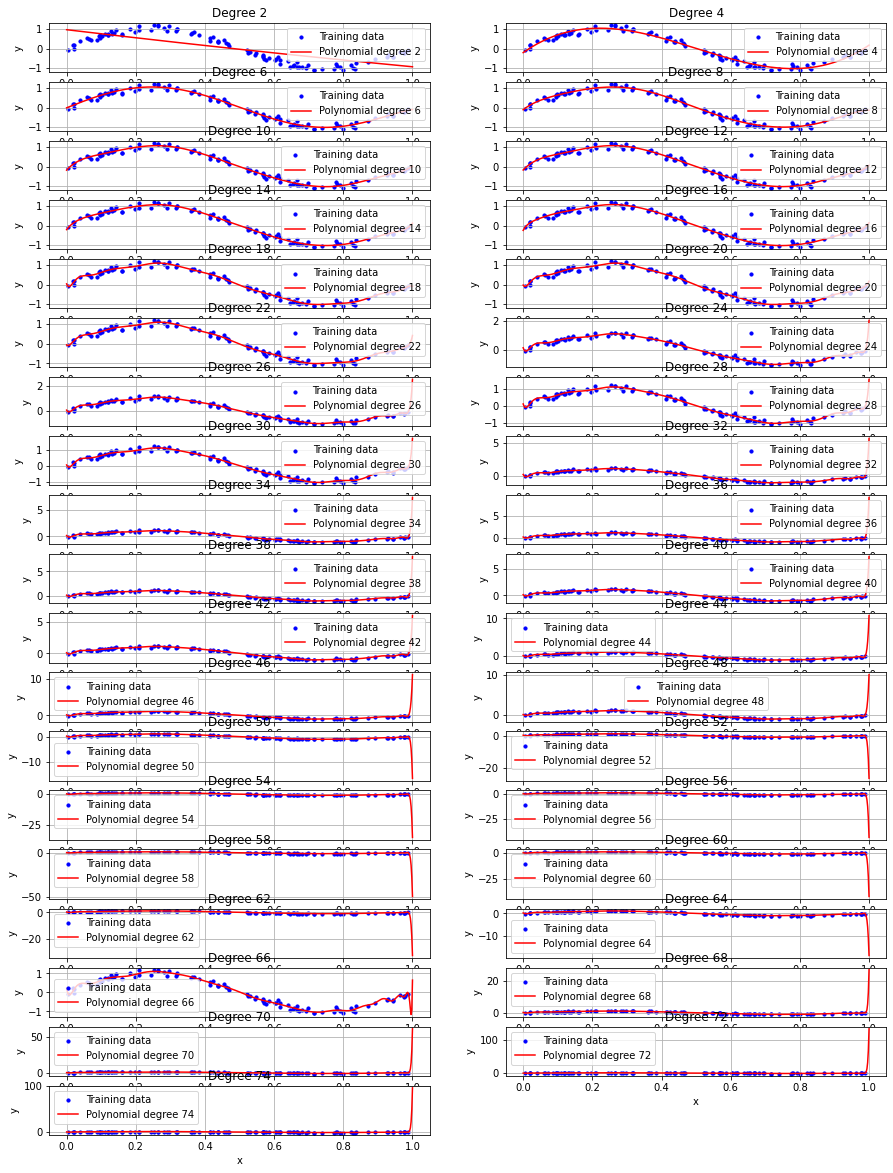

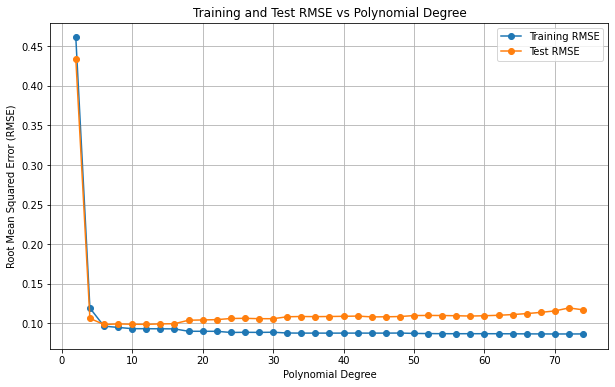

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Generate noisy data
np.random.seed(0)
x_train = np.sort(np.random.rand(100))  # 100 training data points
y_train = np.sin(2 * np.pi * x_train) + np.random.normal(0, 0.1, x_train.shape)  # Add noise
x_test = np.sort(np.random.rand(50))   # 50 test data points
y_test = np.sin(2 * np.pi * x_test) + np.random.normal(0, 0.1, x_test.shape)  # Add noise

# Function to create polynomial features
def polynomial_features(x, degree):
    return np.vander(x, degree + 1, increasing=True)

# Function to fit polynomial regression
def polynomial_regression(x, y, degree):
    X = polynomial_features(x, degree)
    coeffs = np.linalg.lstsq(X, y, rcond=None)[0]
    return coeffs

# Function to predict using polynomial regression
def predict(x, coeffs):
    degree = len(coeffs) - 1
    X = polynomial_features(x, degree)
    return X @ coeffs

# Compute errors for various polynomial degrees
degrees = range(2, 76, 2)  # Degrees from 2 to 75 in steps of 2
train_errors = []
test_errors = []

plt.figure(figsize=(15, 40))  # Adjusted figure size for more subplots

for i, degree in enumerate(degrees):
    # Fit model
    coeffs = polynomial_regression(x_train, y_train, degree)
    
    # Compute training and test predictions
    y_train_pred = predict(x_train, coeffs)
    y_test_pred = predict(x_test, coeffs)
    
    # Compute RMSE
    train_rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
    test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
    
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

    # Plot regression curve
    x_range = np.linspace(0, 1, 500)  # High-resolution x values for smooth curve
    y_range_pred = predict(x_range, coeffs)

    plt.subplot(37, 2, i + 1)  # 37 rows, 2 columns for subplots
    plt.scatter(x_train, y_train, color='blue', label='Training data', s=10)
    plt.plot(x_range, y_range_pred, color='red', label=f'Polynomial degree {degree}')
    plt.title(f'Degree {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

# Plot errors
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training RMSE', marker='o')
plt.plot(degrees, test_errors, label='Test RMSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Training and Test RMSE vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()
